In [1]:
import numpy as np
import torch

np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float64')
torch.save(data, open('traindata.pt', 'wb'))

In [2]:
import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt

In [3]:
class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input, future = 0):
        outputs = []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for input_t in input.split(1, dim=1):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        for i in range(future):# if we should predict the future
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        outputs = torch.cat(outputs, dim=1)
        return outputs

In [4]:
# set random seed to 0
np.random.seed(0)
torch.manual_seed(0)

In [5]:
# load data and make training set
data = torch.load('traindata.pt')

In [6]:
input = torch.from_numpy(data[3:, :-1])
target = torch.from_numpy(data[3:, 1:])
test_input = torch.from_numpy(data[:3, :-1])
test_target = torch.from_numpy(data[:3, 1:])

In [7]:
# build the model
seq = Sequence()
seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.8)

STEP:  0
loss: 0.5023738122475573
loss: 0.49856639379435647
loss: 0.479011960611529
loss: 0.446334902148423
loss: 0.35406310257492973
loss: 0.2050701661768142
loss: 1.3960531561167422
loss: 0.032494411484718
loss: 0.029934875839604243
loss: 0.028326821011534175
loss: 0.026830612218823123
loss: 0.023771201989989672
loss: 0.018901413504545633
loss: 0.010646818233205601
loss: 0.008725752090268482
loss: 0.007872181287777209
loss: 0.00547784274959428
loss: 0.0040519335640637096
loss: 0.0027296227011590823
loss: 0.0015402652769808689
test loss: 0.0013000876156956049


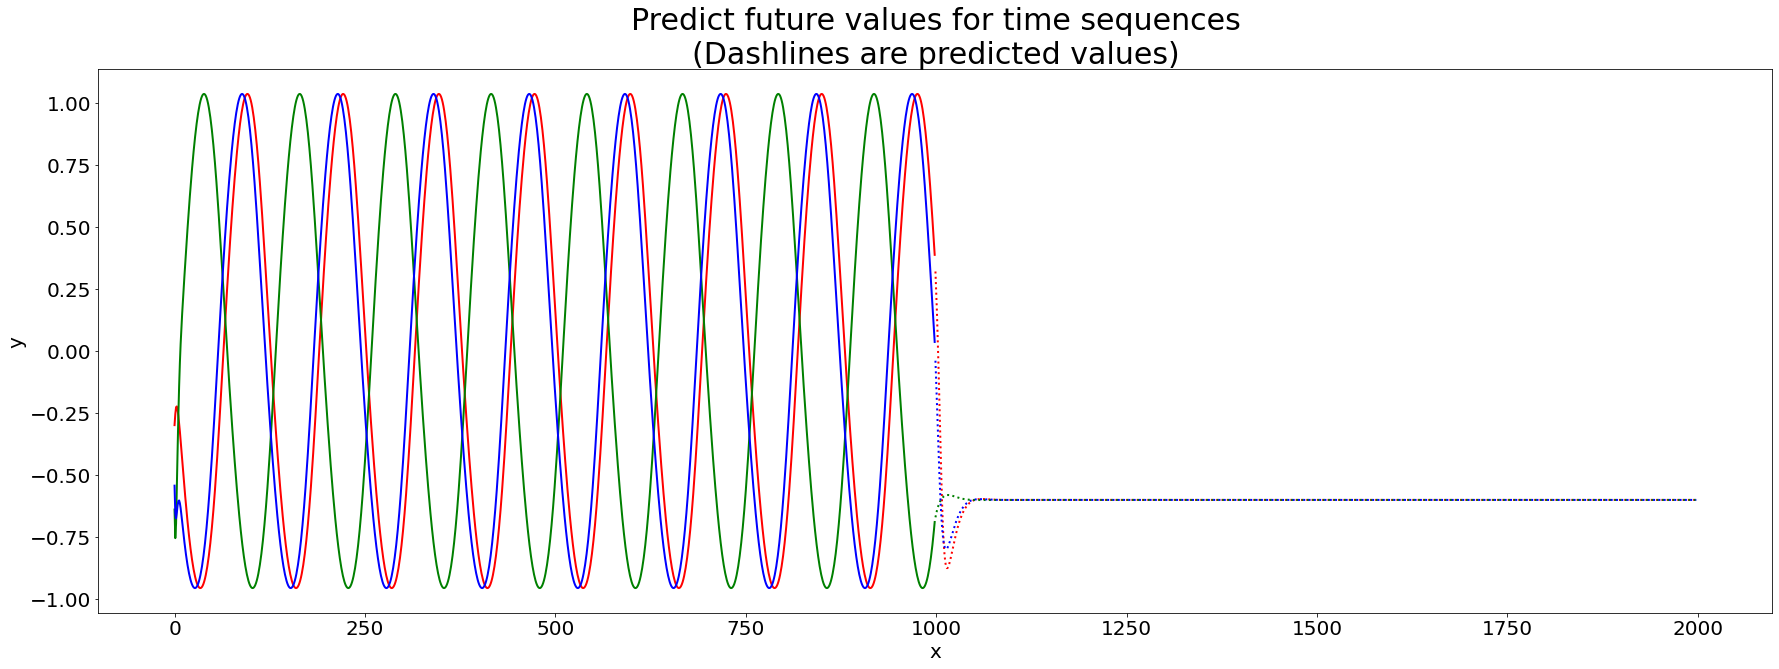

STEP:  1
loss: 0.0012797646167827309
loss: 0.0011690554954717565
loss: 0.0011498916013728243
loss: 0.001128824529128144
loss: 0.0010630561341024923
loss: 0.0009564006443281654
loss: 0.0008210827589982468
loss: 0.0007670796029146269
loss: 0.0007294716423578498
loss: 0.0007246558169811819
loss: 0.0007206211393649178
loss: 0.0007126686053107207
loss: 0.000696131049877021
loss: 0.0006641101811542972
loss: 0.0006101210702277711
loss: 0.0005285228387104284
loss: 0.00041272507102846226
loss: 0.00033021579452189383
loss: 0.00031217121493982134
loss: 0.00032352192205944893
test loss: 0.00017005112895099675


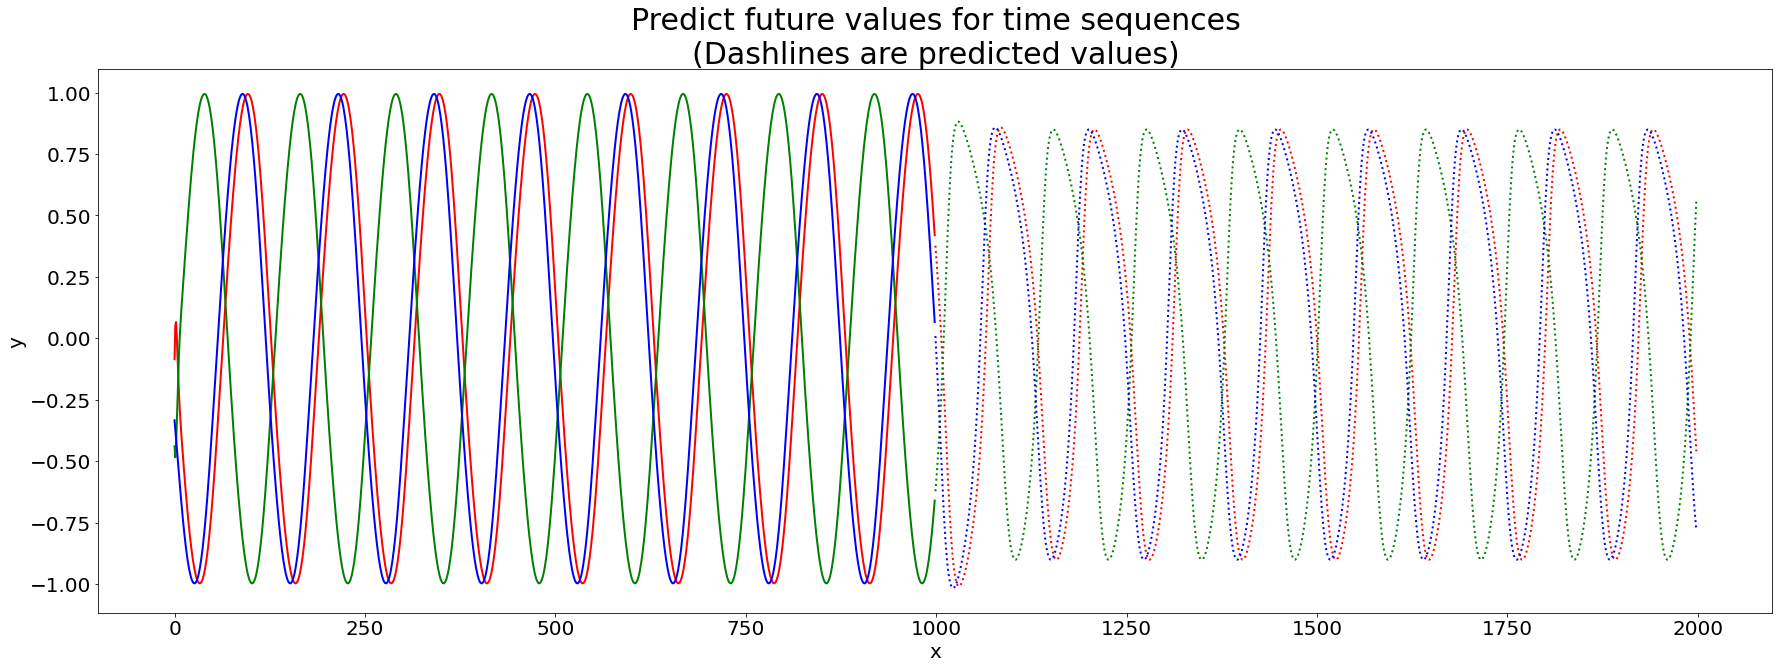

STEP:  2
loss: 0.0003053078927277277
loss: 0.0003041496583644905
loss: 0.00030351297478212544
loss: 0.00030276531287187997
loss: 0.00030103213900653785
loss: 0.00029744084426451637
loss: 0.00029076089116446404
loss: 0.0002809478859792284
loss: 0.0002682227137286811
loss: 0.00025221919695743287
loss: 0.0002392022232790208
loss: 0.00022590525893501396
loss: 0.0002271961306479846
loss: 0.00020802021407433923
loss: 0.00020050239660619816
loss: 0.00019149492309887808
loss: 0.00018777715169070872
loss: 0.00018122790437927002
loss: 0.00017671387789656496
loss: 0.00016960355097101333
test loss: 6.615079323793842e-05


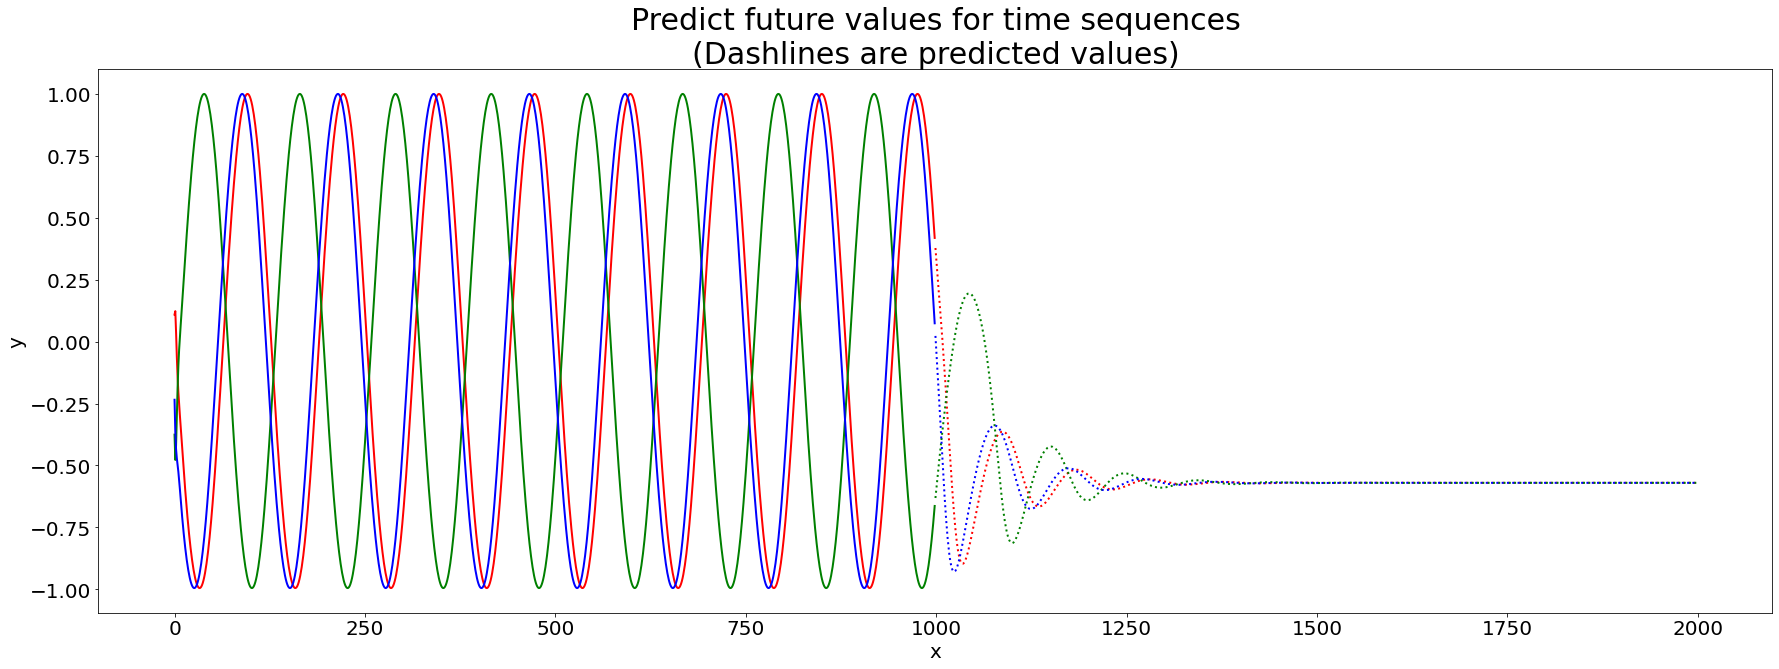

STEP:  3
loss: 0.00016001388197999346
loss: 0.00015376838500356894
loss: 0.0001515606044079618
loss: 0.00015186142351036593
loss: 0.00015115942793648667
loss: 0.00015102884213642504
loss: 0.00015083292548585326
loss: 0.00015070632192568955
loss: 0.00015045822237640322
loss: 0.0001500514251707383
loss: 0.0001497251329126437
loss: 0.000149029701155044
loss: 0.00014791091920294665
loss: 0.00014592474704998204
loss: 0.000142396086872887
loss: 0.0001377504545090963
loss: 0.0001234136001321312
loss: 0.00010522420842997718
loss: 0.00012598327369240238
loss: 0.00010584099722158588
test loss: 4.079810305277338e-05


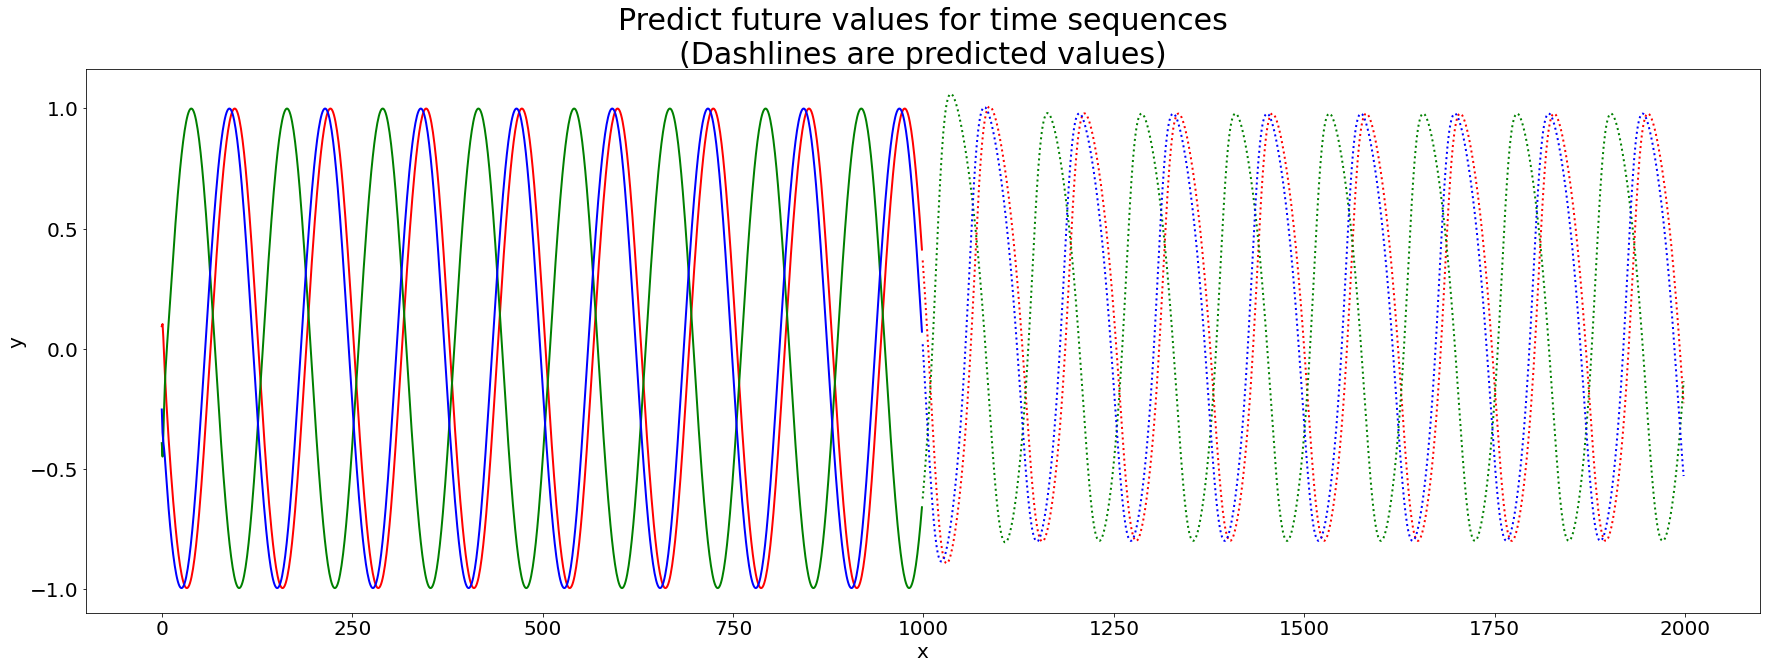

STEP:  4
loss: 9.140770630218402e-05
loss: 8.852362621397422e-05
loss: 8.404064833805402e-05
loss: 7.90864497312778e-05
loss: 7.640385972736785e-05
loss: 7.338810547758772e-05
loss: 7.15385407073478e-05
loss: 7.10676383734375e-05
loss: 7.068615288435136e-05
loss: 7.055590755100825e-05
loss: 7.051953988881061e-05
loss: 7.048190495113285e-05
loss: 7.016759743747775e-05
loss: 6.959172320977473e-05
loss: 6.871309318731377e-05
loss: 6.760284871514442e-05
loss: 6.273048296735813e-05
loss: 5.785474897275612e-05
loss: 0.0001993951434802991
loss: 5.6113962106084176e-05
test loss: 7.006077988468018e-05


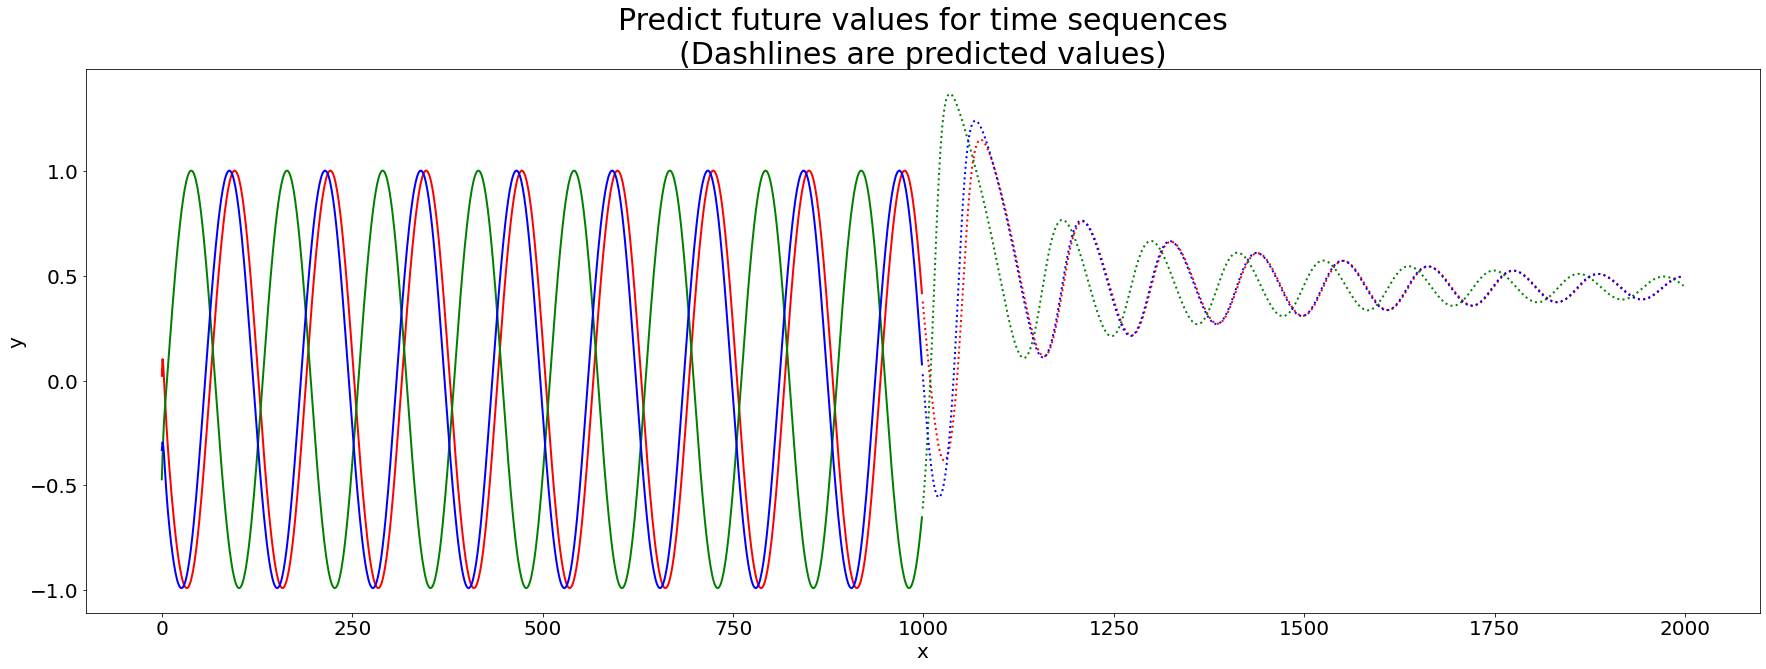

STEP:  5
loss: 7.670119876959061e-05
loss: 4.29774546653094e-05
loss: 3.680201595450921e-05
loss: 3.453476587521788e-05
loss: 2.9616882986143728e-05
loss: 2.8452125644952136e-05
loss: 2.7147444857828742e-05
loss: 2.5133109894181782e-05
loss: 2.4122866523574778e-05
loss: 2.3902667754835387e-05
loss: 2.3767397117400614e-05
loss: 2.3747907732911208e-05
loss: 2.370477951733986e-05
loss: 2.366402728166865e-05
loss: 2.3586799663413612e-05
loss: 2.3392126846957036e-05
loss: 2.3098917887675824e-05
loss: 2.2898266731563567e-05
loss: 2.2633377583134567e-05
loss: 2.191029317636186e-05


In [ ]:
steps = 15


#begin to train
for i in range(steps):
    print('STEP: ', i)
    
    def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('loss:', loss.item())
        loss.backward()
        return loss
    optimizer.step(closure)
    
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        future = 1000
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.item())
        y = pred.detach().numpy()

    # draw the result
    plt.figure(figsize=(30,10))
    plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    def draw(yi, color):
        plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
        plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
    draw(y[0], 'r')
    draw(y[1], 'g')
    draw(y[2], 'b')
    plt.show()
#     plt.savefig('predict%d.pdf'%i)
#     plt.close()